# Customisation of 'Logistic Regression'

So first again I am going to include the exercises from the notebook that don't analyse a specififc data set and then I am going to do logistic regression on the titanic dataset.

## Exercise I: Inference and Prediction for the Homogeneous-Probability Bernoulli Model
#### a) Simulate a sample of n = 100 Bernoulli distributed outcomes, with the following probability parameter:

In [2]:

import numpy as np

# Given parameters
n = 100  # sample size
pi = np.random.uniform()  # Simulating a random probability for the Bernoulli process

# Generating a sample of n Bernoulli outcomes with probability pi
bernoulli_sample = np.random.binomial(1, pi, size=n)

# We won't reveal pi since it's meant to be estimated
bernoulli_sample


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

#### b) Plot the distribution for this set of Bernoulli outcomes

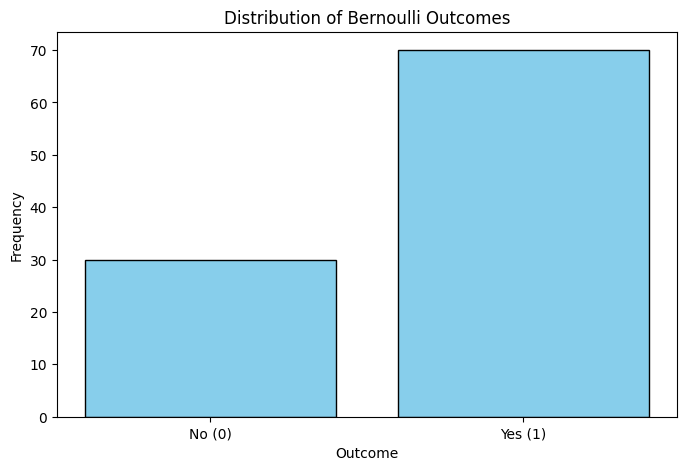

In [3]:
import matplotlib.pyplot as plt

# Plotting the distribution of the Bernoulli outcomes
plt.figure(figsize=(8, 5))
plt.hist(bernoulli_sample, bins=[-0.5, 0.5, 1.5], edgecolor='black', color='skyblue', rwidth=0.8)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Bernoulli Outcomes')
plt.show()

#### c) Estimate the value of $\pi$ which is most likely to have generated this set of observations

In [4]:
# Estimating the value of pi using the sample mean
pi_estimate = np.mean(bernoulli_sample)
pi_estimate

0.7

#### d) There is uncertainty around this estimate. In theory, why might such uncertainty arise ? 


1. **Sample Size (n)**:  
   - When the sample size is small, each observation has a significant impact on the estimate, leading to greater uncertainty. As the sample size increases, however, the Law of Large Numbers comes into play, meaning the sample mean tends to stabilize closer to the true value of \( \pi \). This stabilization reduces uncertainty in larger datasets.

2. **Variability in the Data**:  
   - Even with a robust sample size, random variation still plays a role. The nature of each trial in a Bernoulli distribution is independent, and outcomes—like whether someone supports a right-of-center political party—can fluctuate unpredictably. As a result, different samples may yield different estimates, simply because of inherent randomness.

3. **True Value of \( \pi \)**:  
   - The true value of \( \pi \) itself influences variability. When \( \pi \) hovers around 0.5, outcomes between 'yes' and 'no' are more evenly split, which can lead to greater variability in the sample estimates. On the other hand, if \( \pi \) is closer to the extremes (near 0 or 1), outcomes become more predictable, and variability tends to decrease.

4. **Bias and Sampling Method**:  
   - The sampling method matters significantly. If the way data is collected introduces bias, it can skew the estimates, making them unreliable. A non-representative sample could systematically lean towards incorrect values, increasing uncertainty and making the estimate less trustworthy.

5. **Statistical Noise**:  
   - All statistical measurements are subject to noise. Factors like measurement errors or unaccounted external influences add layers of unpredictability, making it harder to precisely capture the true value of \( \pi \). This noise complicates the estimation process, adding another source of uncertainty.

Together, these factors explain why estimating \( \pi \) from data isn’t straightforward. Statisticians typically address this uncertainty using tools like confidence intervals or statistical tests to gauge the range in which the true \( \pi \) likely falls.

#### e) Represent the uncertainty around this estimate using the approximate posterior distribution evaluated at the MLE. Simulate 1000 values of $\pi$ under this distribution. Plot a histogram of the approximate posterior. 

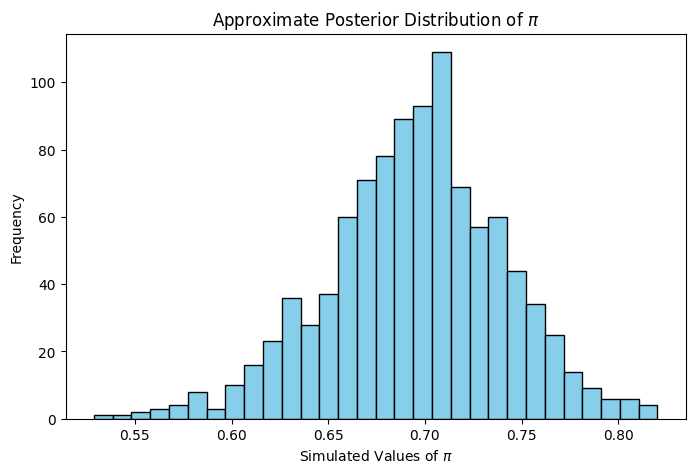

In [5]:
from scipy.stats import beta

# Calculating the posterior parameters for the Beta distribution
alpha_posterior = 1 + np.sum(bernoulli_sample)  # successes + 1
beta_posterior = 1 + (n - np.sum(bernoulli_sample))  # failures + 1

# Simulating 1000 values from the approximate posterior distribution
pi_posterior_samples = beta.rvs(alpha_posterior, beta_posterior, size=1000)

# Plotting the histogram of the simulated values
plt.figure(figsize=(8, 5))
plt.hist(pi_posterior_samples, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Simulated Values of $\\pi$')
plt.ylabel('Frequency')
plt.title('Approximate Posterior Distribution of $\\pi$')
plt.show()

#### f) For each simulated value of $\pi$, generate a new sample of observations `y`. Plot the histogram of these newly generated samples. If you were to observe a new individual from this population, would you classify them as a right-of-centre voter ? and why ?  

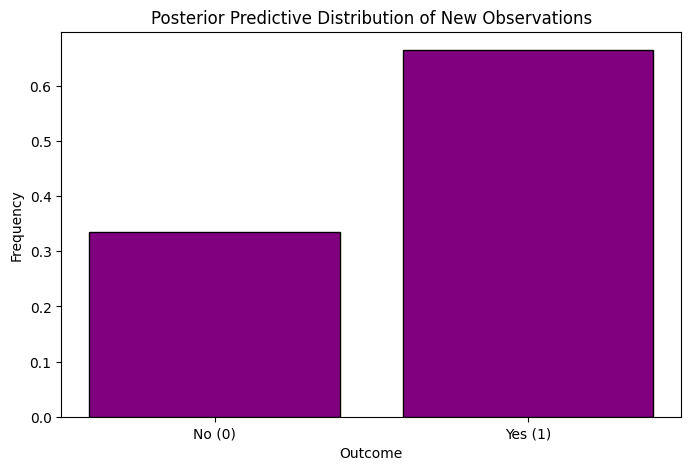

In [6]:
from scipy.stats import bernoulli

# Generate new values of y corresponding to each value of pi from the posterior simulations
post_pred_sims = [bernoulli.rvs(pi) for pi in pi_posterior_samples]

# Plotting the histogram of the new simulated y values
plt.figure(figsize=(8, 5))
plt.hist(post_pred_sims, bins=[-0.5, 0.5, 1.5], color='purple', edgecolor='black', rwidth=0.8, density = True)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Distribution of New Observations')
plt.show()

# Customization of 'Logistic Regression'

I chose the Titanic dataset for this notebook because I thought it was interetsing to look at the facts behind the catastrophe and I also did nto know that actually a decent amount of people survived. 

## Objective
The aim of this notebook is to use logistic regression to predict the likelihood of survival for Titanic passengers based on their demographic and ticket class information. The model provides insights into which factors most strongly influenced survival.

## Importing Packages
To begin, we will import the necessary Python libraries for data analysis, visualization, and modeling. These include:
- **pandas** and **numpy** for data manipulation,
- **matplotlib** and **seaborn** for visualization, and
- **statsmodels** for logistic regression.

## Exploring the Dataset
Before diving into the modeling process, let's take a look at the Titanic dataset to understand its structure and characteristics.

### Data Set Characteristics:
- **Number of Instances**: 891  
- **Number of Attributes**: 12  
- **Target Variable**: **Survived** (binary, 0 = did not survive, 1 = survived)

### Attribute Information:
- **PassengerId**: Unique identifier for each passenger  
- **Survived**: Survival status (0 = No, 1 = Yes)  
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- **Name**: Name of the passenger  
- **Sex**: Gender of the passenger  
- **Age**: Age of the passenger  
- **SibSp**: Number of siblings/spouses aboard  
- **Parch**: Number of parents/children aboard  
- **Ticket**: Ticket number  
- **Fare**: Fare paid for the ticket  
- **Cabin**: Cabin number  
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)




In [7]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, bernoulli
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm


First I am loading and cleaning the data and then I am making dummies from sex and embarked and creating a design matrix

In [21]:
import pandas as pd

# Use the Titanic dataset for this example
df = pd.read_csv('Titanic-Dataset.csv')

# Preprocessing
# Age: Keep as is, filling missing values with the median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(df['Age'].median())

# Sex: Convert to binary (1 for male, 0 for female)
df['Sex_Male'] = df['Sex'].apply(lambda x: 1 if x.strip().lower() == 'male' else 0)

# Pclass: Keep as is (already numeric)

# Embarked: Convert to binary dummies (remembering the dummy trap)
# Assuming the values are 'C', 'Q', 'S' for Cherbourg, Queenstown, Southampton
# Generate dummy variables for the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=True)  # Drop the first category to avoid dummy trap

# Convert True/False to 1/0
embarked_dummies = embarked_dummies.astype(int)

# SibSp and Parch: Keep as is (numeric and useful for predictors)

# Create the design matrix
X = pd.concat([df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_Male']], embarked_dummies], axis=1)

# Display the first few rows of the design matrix
print("Design Matrix:")
print(X.head())

# Optionally, drop rows with missing values (or handle them as appropriate)
X = X.dropna()

# Verify the final shape of the design matrix
print("Final design matrix shape:", X.shape)

# Display the first few rows of the processed dataset
print(X.head())


Design Matrix:
    Age  Pclass  SibSp  Parch     Fare  Sex_Male  Q  S
0  22.0       3      1      0   7.2500         1  0  1
1  38.0       1      1      0  71.2833         0  0  0
2  26.0       3      0      0   7.9250         0  0  1
3  35.0       1      1      0  53.1000         0  0  1
4  35.0       3      0      0   8.0500         1  0  1
Final design matrix shape: (891, 8)
    Age  Pclass  SibSp  Parch     Fare  Sex_Male  Q  S
0  22.0       3      1      0   7.2500         1  0  1
1  38.0       1      1      0  71.2833         0  0  0
2  26.0       3      0      0   7.9250         0  0  1
3  35.0       1      1      0  53.1000         0  0  1
4  35.0       3      0      0   8.0500         1  0  1


### Exploring the correlation matrix between the covariates and the outcome.

Correlation matrix:
          Survived       Age    Pclass     SibSp     Parch      Fare  \
Survived  1.000000 -0.064910 -0.338481 -0.035322  0.081629  0.257307   
Age      -0.064910  1.000000 -0.339898 -0.233296 -0.172482  0.096688   
Pclass   -0.338481 -0.339898  1.000000  0.083081  0.018443 -0.549500   
SibSp    -0.035322 -0.233296  0.083081  1.000000  0.414838  0.159651   
Parch     0.081629 -0.172482  0.018443  0.414838  1.000000  0.216225   
Fare      0.257307  0.096688 -0.549500  0.159651  0.216225  1.000000   
Sex_Male -0.543351  0.081163  0.131900 -0.114631 -0.245489 -0.182333   
Q         0.003650 -0.031415  0.221009 -0.026354 -0.081228 -0.117216   
S        -0.155660 -0.014665  0.081720  0.070941  0.063036 -0.166603   

          Sex_Male         Q         S  
Survived -0.543351  0.003650 -0.155660  
Age       0.081163 -0.031415 -0.014665  
Pclass    0.131900  0.221009  0.081720  
SibSp    -0.114631 -0.026354  0.070941  
Parch    -0.245489 -0.081228  0.063036  
Fare     -0.1

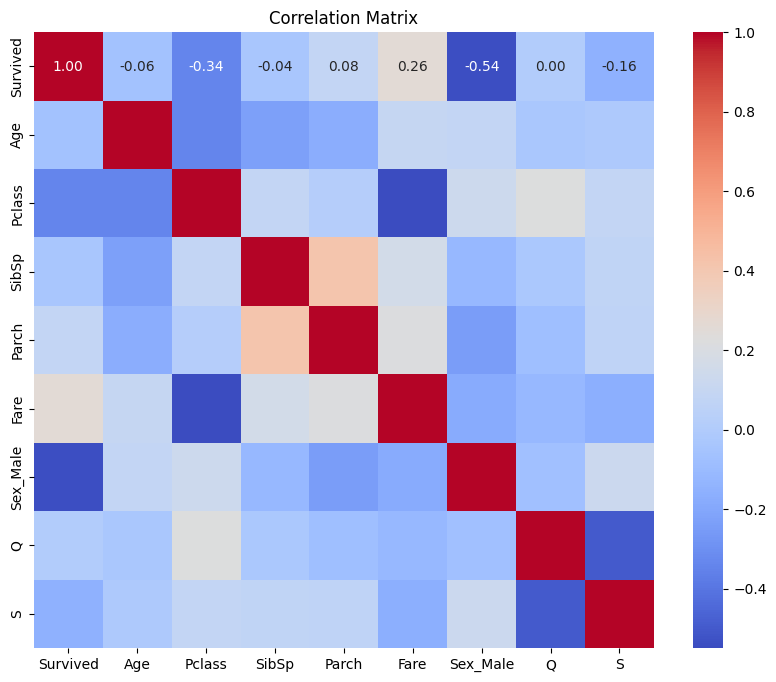

Correlation of covariates with Survival:
Survived    1.000000
Fare        0.257307
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.064910
S          -0.155660
Pclass     -0.338481
Sex_Male   -0.543351
Name: Survived, dtype: float64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Y = df['Survived']

# Combine Y and X into a single DataFrame
YX = pd.concat([Y, X], axis=1)

# Drop rows with missing values in YX (if any)
YX = YX.dropna()

# Calculate the correlation matrix
correlation_matrix = YX.corr()  # Correlation matrix of the combined DataFrame

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Identify the most correlated variables with Survival
correlations_with_survival = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation of covariates with Survival:")
print(correlations_with_survival)


The correlation matrix shows the relationships between variables in the Titanic dataset and survival. Survival has a strong negative correlation with being male (correlation = -0.54) and with passenger class (correlation = -0.34), indicating that males and lower-class passengers were less likely to survive. Fare is positively correlated with survival (correlation = 0.26), suggesting that passengers who paid higher fares had better chances of survival. Other variables like age (correlation = -0.06) and the number of siblings/spouses aboard (correlation = -0.03) have weaker correlations with survival, indicating minimal direct impact.

### Fitting the logistic regression model using statsmodels.

In [24]:
import statsmodels.api as sm

# Extract Y (Survived) and X (design matrix)
Y = YX['Survived']  # Outcome variable
X = YX.drop(columns=['Survived'])  # Predictor variables (design matrix)

# Add an intercept to the predictors DataFrame
X_with_intercept = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
model = sm.Logit(Y, X_with_intercept)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

# Check if the model has converged
if result.mle_retvals['converged']:
    print("The model estimation has converged.")
else:
    print("The model estimation has not converged. Please check the data or model configuration.")



Optimization terminated successfully.
         Current function value: 0.440705
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.3382
Time:                        00:31:06   Log-Likelihood:                -392.67
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.783e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2557      0.562      9.351      0.000       4.154       6.357
Age           -0.0391      0.


This logistic regression model predicts Titanic survival and shows that significant factors include being male (beta = -2.73, p < 0.001), passenger class (beta = -1.10, p < 0.001), age (beta = -0.039, p < 0.001), and the number of siblings/spouses aboard (beta = -0.32, p = 0.003), all negatively associated with survival. The intercept (beta = 5.26, p < 0.001) represents the baseline log-odds of survival, while variables like fare, number of parents/children aboard, and embarkation points (Q and S) were not statistically significant (p > 0.05). The model explains 33.8% of the variance (pseudo R-squared = 0.338) and converged successfully.

### Simulating 1000 values for for each regression coefficient, from the approximate posterior distribution.

In [26]:
import numpy as np
import statsmodels.api as sm

# Assuming 'X_with_intercept' and 'Y' are already defined and prepared:
X_with_intercept = sm.add_constant(X)  # Adding an intercept to predictors, if not already added
model = sm.Logit(Y, X_with_intercept)

# Fit the model
result = model.fit()

# Now, extract the coefficients (betas) and their covariance matrix from the fit results
beta_mean = result.params
beta_cov = result.cov_params()

# Number of simulations
n_simulations = 1000

# Simulate beta coefficients using the means and covariance matrix
simulated_betas = np.random.multivariate_normal(beta_mean, beta_cov, n_simulations)

# Output the first few simulations to check
print("First few simulated beta coefficients:")
print(simulated_betas[:5])

Optimization terminated successfully.
         Current function value: 0.440705
         Iterations 6
First few simulated beta coefficients:
[[ 5.46530252e+00 -3.65076318e-02 -1.10729332e+00 -2.35508028e-01
  -3.48011630e-01  5.05871521e-03 -3.08334659e+00 -4.46817556e-01
  -5.59164724e-01]
 [ 5.56059458e+00 -3.61444645e-02 -1.20256470e+00 -5.25450582e-01
   7.00894493e-02  7.41815633e-04 -2.61008192e+00 -1.83805875e-01
  -6.29422895e-01]
 [ 5.40271749e+00 -3.71371295e-02 -1.21621025e+00 -2.17253962e-01
  -2.23128453e-01  2.14094812e-03 -2.80458583e+00 -2.89869715e-01
  -2.68749241e-01]
 [ 5.67502445e+00 -4.62430855e-02 -1.00583854e+00 -6.48481807e-01
  -9.61641967e-02  2.29783573e-03 -3.06284805e+00  1.39976173e-01
  -5.74386721e-01]
 [ 4.48432962e+00 -2.42730042e-02 -8.13753453e-01 -3.11302708e-01
  -1.25192319e-01 -3.22546221e-04 -2.58243828e+00 -7.57520974e-01
  -8.03425651e-01]]


### Summary Statistics and the probability of the coefficient being higher than 0

Summary Statistics and Probability of Coefficient > 0:
               Mean       STD  Prob > 0
Intercept  5.267584  0.558578     1.000
Age       -0.039273  0.007811     0.000
Pclass    -1.104641  0.142864     0.000
SibSp     -0.325340  0.111457     0.003
Parch     -0.088746  0.118682     0.237
Fare       0.001905  0.002253     0.806
Sex_Male  -2.726512  0.202807     0.000
Q         -0.066061  0.360013     0.416
S         -0.417037  0.232482     0.042


/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

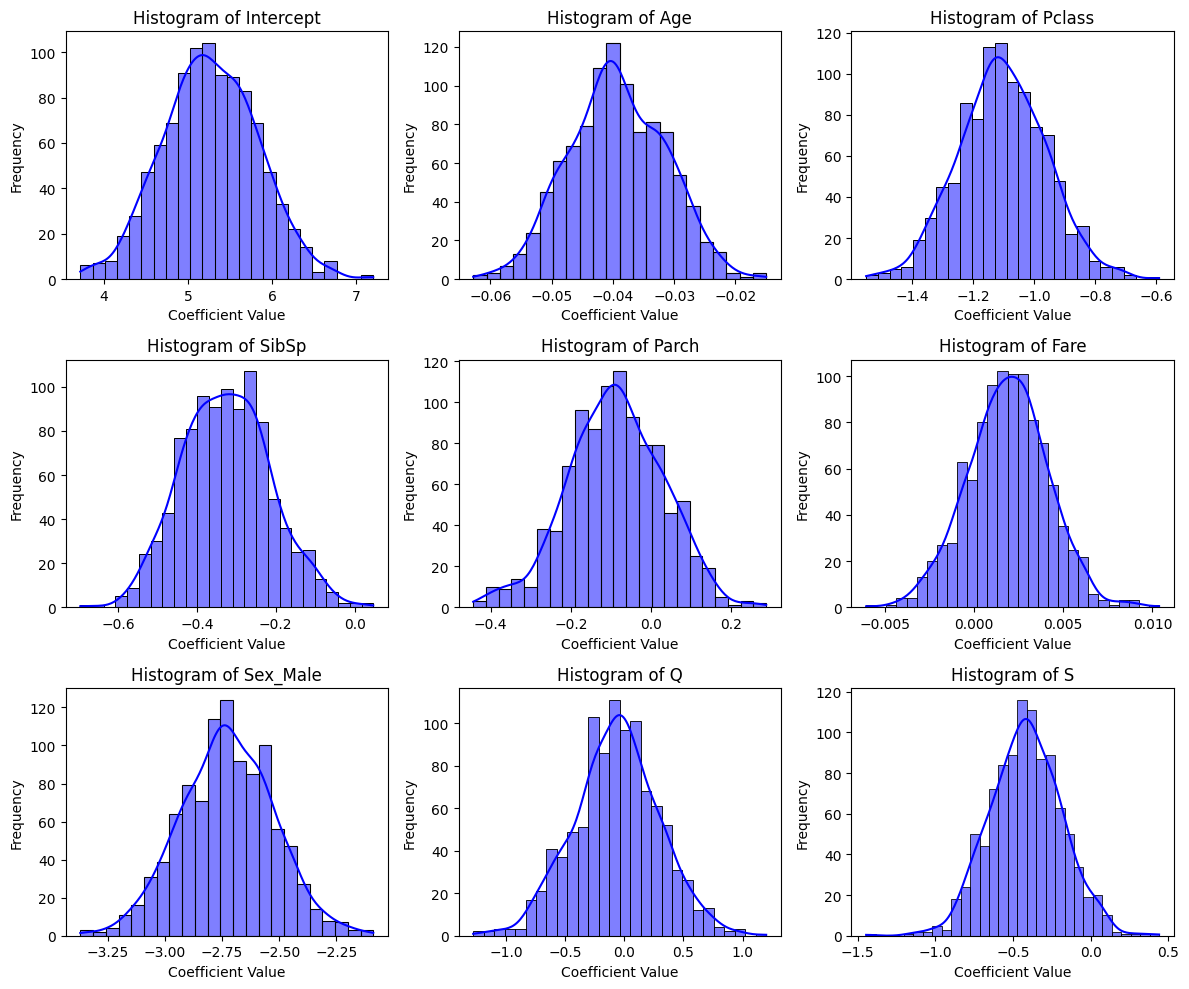

In [28]:
mean_betas = np.mean(simulated_betas, axis=0)
std_betas = np.std(simulated_betas, axis=0)
prob_positive = np.mean(simulated_betas > 0, axis=0)

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_betas,
    'STD': std_betas,
    'Prob > 0': prob_positive
}, index=['Intercept'] + list(X.columns))

print("Summary Statistics and Probability of Coefficient > 0:")
print(summary_stats)

# Plot histograms of simulated betas
plt.figure(figsize=(12, 10))
for i, column in enumerate(summary_stats.index):
    plt.subplot(3, 3, i + 1)
    sns.histplot(simulated_betas[:, i], kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

This visualization shows the distributions of simulated coefficients (betas) from a logistic regression model for various predictors of Titanic survival. Each histogram represents the range and density of the simulated values for a specific predictor. For example, the "Intercept" has a mean value around 5.5, suggesting a baseline log-odds of survival. Predictors like "Age" and "Pclass" show narrow distributions with coefficients mostly between -0.06 to -0.02 and -1.4 to -0.6, respectively, indicating a negative association with survival. "Sex_Male" has a strong negative mean coefficient around -2.75, highlighting a significant impact on survival probability. Other predictors like "Fare" and "Parch" have distributions centered closer to zero, suggesting weaker effects. Overall, the histograms demonstrate variability and uncertainty across predictors in determining survival outcomes.

/Users/josefinemertens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


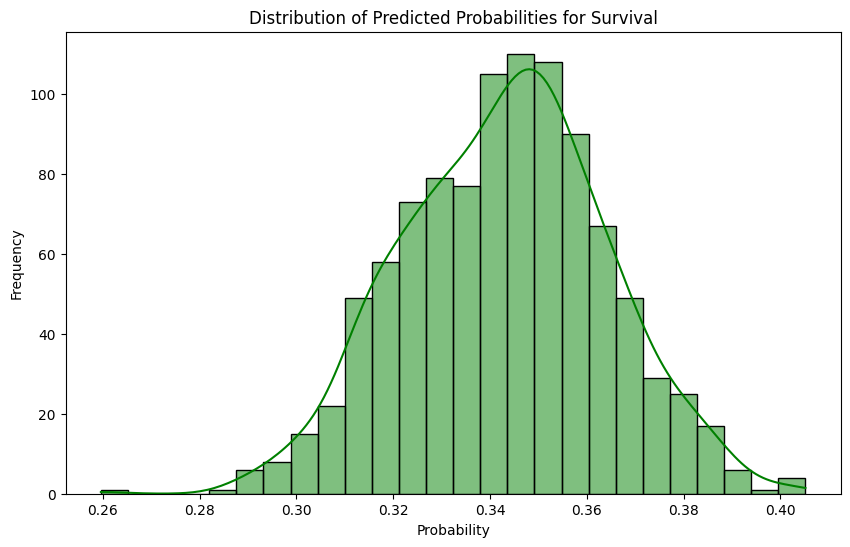

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the logistic sigmoid function
def logistic_sigmoid(mu):
    return 1 / (1 + np.exp(-mu))

# Calculate the average of the sample for each predictor (ensure intercept is included)
average_X = X_with_intercept.mean(axis=0)

# Generate new predicted probabilities for the average observation using the simulated betas
# For each simulation, compute the dot product of average_X and simulated beta, then apply the sigmoid function
new_predicted_probs = logistic_sigmoid(np.dot(simulated_betas, average_X.values))

# Output the results
#print("Predicted probabilities for the average Titanic passenger:")
#print(new_predicted_probs)

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(new_predicted_probs, kde=True, color='green')
plt.title('Distribution of Predicted Probabilities for Survival')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


This histogram displays the distribution of predicted probabilities for survival based on a logistic regression model. The probabilities are centered around a mean of approximately 0.34, indicating that the average passenger has about a 34% chance of survival. The distribution is fairly symmetric, with most probabilities ranging from 0.30 to 0.38, and tails extending from around 0.26 to 0.40. This suggests moderate survival likelihood for the average observation in the dataset.

### Posterior Predictive Destribution of the Outcome Y

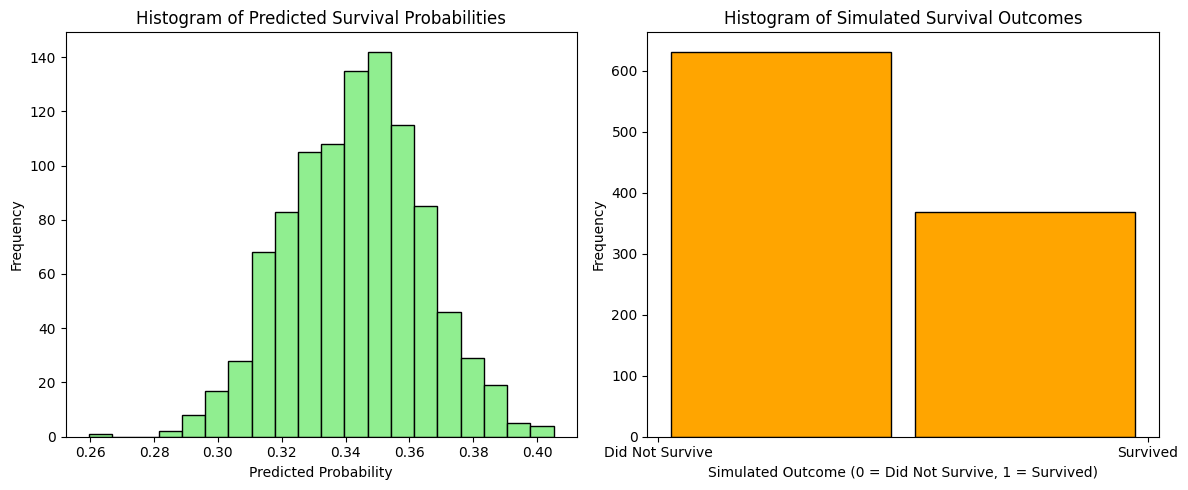

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate outcomes for the new observation based on the predicted probabilities
# Each probability is treated as the success parameter for a Bernoulli trial
new_simulated_outcomes = np.random.binomial(1, new_predicted_probs, size=1000)

# Plotting both predicted probabilities and simulated outcomes in histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of predicted probabilities
axes[0].hist(new_predicted_probs, bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title('Histogram of Predicted Survival Probabilities')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')

# Histogram of simulated outcomes
axes[1].hist(new_simulated_outcomes, bins=2, color='orange', edgecolor='black', rwidth=0.9)
axes[1].set_title('Histogram of Simulated Survival Outcomes')
axes[1].set_xlabel('Simulated Outcome (0 = Did Not Survive, 1 = Survived)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()


The left histogram shows the predicted survival probabilities for Titanic passengers, centered around 0.34, with most values between 0.30 and 0.38. This suggests that the average passenger has a 34% likelihood of survival. The right histogram displays simulated survival outcomes based on these probabilities, where approximately 600 instances resulted in "Did Not Survive" (0) and around 400 instances resulted in "Survived" (1), highlighting that survival was less likely than not for the average passenger.